In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [183]:
df_fifa = pd.read_csv('../unsupervised_project/male_players.csv',low_memory=False)

In [9]:
df_fifa.head()

,player_id,player_url,fifa_version,fifa_update,update_as_of,short_name,long_name,player_positions,overall,potential,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,231747,/player/231747/kylian-mbappe/240002,24.0,2.0,2023-09-22,K. Mbappé,Kylian Mbappé Lottin,"ST, LW",91,94,...,63+3,63+3,63+3,68+3,63+3,54+3,54+3,54+3,63+3,18+3
1,239085,/player/239085/erling-haaland/240002,24.0,2.0,2023-09-22,E. Haaland,Erling Braut Haaland,ST,91,94,...,63+3,63+3,63+3,62+3,60+3,62+3,62+3,62+3,60+3,19+3
2,192985,/player/192985/kevin-de-bruyne/240002,24.0,2.0,2023-09-22,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,...,80+3,80+3,80+3,79+3,75+3,70+3,70+3,70+3,75+3,21+3
3,158023,/player/158023/lionel-messi/240002,24.0,2.0,2023-09-22,L. Messi,Lionel Andrés Messi Cuccittini,"CF, CAM",90,90,...,63+3,63+3,63+3,64+3,59+3,49+3,49+3,49+3,59+3,19+3
4,165153,/player/165153/karim-benzema/240002,24.0,2.0,2023-09-22,K. Benzema,Karim Benzema,"CF, ST",90,90,...,64+3,64+3,64+3,64+3,60+3,55+3,55+3,55+3,60+3,18+3


In [176]:
df_fifa.iloc[6]

player_id                                       192119
player_url      /player/192119/thibaut-courtois/240002
fifa_version                                      24.0
fifa_update                                        2.0
update_as_of                                2023-09-22
                                 ...                  
lcb                                               29+3
cb                                                29+3
rcb                                               29+3
rb                                                29+3
gk                                                88+2
Name: 6, Length: 109, dtype: object

In [11]:
df_fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180021 entries, 0 to 180020
Columns: 109 entries, player_id to gk
dtypes: float64(20), int64(43), object(46)
memory usage: 149.7+ MB


In [12]:
df_fifa.columns

Index(['player_id', 'player_url', 'fifa_version', 'fifa_update',
       'update_as_of', 'short_name', 'long_name', 'player_positions',
       'overall', 'potential',
       ...
       'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk'],
      dtype='object', length=109)

In [13]:
print(df_fifa.columns.tolist())

['player_id', 'player_url', 'fifa_version', 'fifa_update', 'update_as_of', 'short_name', 'long_name', 'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur', 'age', 'dob', 'height_cm', 'weight_kg', 'club_team_id', 'club_name', 'league_id', 'league_name', 'league_level', 'club_position', 'club_jersey_number', 'club_loaned_from', 'club_joined_date', 'club_contract_valid_until_year', 'nationality_id', 'nationality_name', 'nation_team_id', 'nation_position', 'nation_jersey_number', 'preferred_foot', 'weak_foot', 'skill_moves', 'international_reputation', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'player_traits', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed'

# Data Cleaning & Feature Selection

In [14]:
# Check which versions are in the file
print(df_fifa['fifa_version'].unique())

[24. 23. 22. 21. 20. 19. 18. 17. 16. 15.]


In [184]:
# Filter for the latest version (likely 24.0 for EA FC 24)
# We use the max() function to automatically find the latest year
latest_version = df_fifa['fifa_version'].max()
df = df_fifa[df_fifa['fifa_version'] == latest_version].copy()

print(f"Original Row Count: {len(df_fifa)}")
print(f"Filtered Row Count (Latest Version): {len(df)}")

Original Row Count: 180021
Filtered Row Count (Latest Version): 18350


In [16]:
# yeah that make sense single FIFA game usually has around 18,000 players.

In [17]:
# Define "Who" we are clustering
# In unsupervised learning, Garbage In = Garbage Out.

# If we include Goalkeepers (GKs) in the same cluster model as Strikers, it usually breaks the model because GKs have very different stats (e.g., Diving, Reflexes) compared to outfield players (Pace, Shooting).

# Let's focus this project on Outfield Players only.

In [18]:
# Exclude Goalkeepers (position 'GK')
# df = df[df['player_positions'] != 'GK']

# print(f"Count after removing Goalkeepers: {len(df)}")

Count after removing Goalkeepers: 16305


In [23]:
# Selecting "Features"
# We need to choose the specific columns that define a player's "style." We should strictly use numeric skill data.

# selected the best columns from your list for clustering:

In [26]:
df.describe().columns

Index(['player_id', 'fifa_version', 'fifa_update', 'overall', 'potential',
       'value_eur', 'wage_eur', 'age', 'height_cm', 'weight_kg',
       'club_team_id', 'league_id', 'league_level', 'club_jersey_number',
       'club_contract_valid_until_year', 'nationality_id', 'nation_team_id',
       'nation_jersey_number', 'weak_foot', 'skill_moves',
       'international_reputation', 'release_clause_eur', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_intercept

In [88]:
df['mentality_composure']

0        88.0
1        87.0
2        88.0
3        96.0
4        90.0
         ... 
18345    39.0
18346    46.0
18347    40.0
18348    39.0
18349    39.0
Name: mentality_composure, Length: 16305, dtype: float64

In [185]:
# The columns we want 
features = [
       'overall', 'potential','weak_foot', 'skill_moves','international_reputation','pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'defending_marking_awareness',
       'defending_standing_tackle', 'defending_sliding_tackle',
       'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes'
]




X = df[features]

# Check for missing data (NaNs)
print("Missing values in our features:")
print(X.isnull().sum())

Missing values in our features:
overall                           0
potential                         0
weak_foot                         0
skill_moves                       0
international_reputation          0
pace                           2045
shooting                       2045
passing                        2045
dribbling                      2045
defending                      2045
physic                         2045
attacking_crossing                0
attacking_finishing               0
attacking_heading_accuracy        0
attacking_short_passing           0
attacking_volleys                 0
skill_dribbling                   0
skill_curve                       0
skill_fk_accuracy                 0
skill_long_passing                0
skill_ball_control                0
movement_acceleration             0
movement_sprint_speed             0
movement_agility                  0
movement_reactions                0
movement_balance                  0
power_shot_power                

In [99]:
# we can remove goal keeping speed and realuse clause becuase of the nan value. for simplycity iam just changing in above feature column

In [186]:
# latest updation. we forgot to add gk . and after that we now seeing nanvalues . lets check who is it

In [187]:
X[X['pace'].isna()]

,overall,potential,weak_foot,skill_moves,international_reputation,pace,shooting,passing,dribbling,defending,...,power_strength,power_long_shots,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
6,90,90,3,1,5,NaN,NaN,NaN,NaN,NaN,...,70,17,20,18,16,85,89,76,90,93
9,89,90,3,1,5,NaN,NaN,NaN,NaN,NaN,...,78,14,15,19,16,86,85,85,90,89
13,89,89,4,1,5,NaN,NaN,NaN,NaN,NaN,...,78,10,25,13,10,86,85,89,86,91
19,88,89,3,1,3,NaN,NaN,NaN,NaN,NaN,...,78,18,29,15,8,86,82,91,86,86
22,88,88,3,1,4,NaN,NaN,NaN,NaN,NaN,...,78,12,27,14,18,85,90,78,86,87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18319,48,57,2,1,1,NaN,NaN,NaN,NaN,NaN,...,36,7,6,11,10,48,49,49,48,49
18324,48,54,3,1,1,NaN,NaN,NaN,NaN,NaN,...,50,9,15,12,13,56,49,49,42,46
18335,48,49,1,1,1,NaN,NaN,NaN,NaN,NaN,...,41,5,5,13,11,46,45,51,46,51
18336,48,48,2,1,1,NaN,NaN,NaN,NaN,NaN,...,56,9,10,16,12,48,54,46,43,48


In [ ]:
# from above we can clearly see it is gk and we can fill it with 0

In [188]:
X = X.fillna(0)

In [102]:
# checking league level nan level. must be low profile players

In [140]:
X[X['league_level'].isna()][]

In [ ]:
#in league nan values some good overall players is there so we can remove this feature.

In [189]:
X.isnull().sum()

overall                        0
potential                      0
weak_foot                      0
skill_moves                    0
international_reputation       0
pace                           0
shooting                       0
passing                        0
dribbling                      0
defending                      0
physic                         0
attacking_crossing             0
attacking_finishing            0
attacking_heading_accuracy     0
attacking_short_passing        0
attacking_volleys              0
skill_dribbling                0
skill_curve                    0
skill_fk_accuracy              0
skill_long_passing             0
skill_ball_control             0
movement_acceleration          0
movement_sprint_speed          0
movement_agility               0
movement_reactions             0
movement_balance               0
power_shot_power               0
power_jumping                  0
power_stamina                  0
power_strength                 0
power_long

# Model Selection (K_means,PCA)

## We will tell it to find 4 Groups (roughly: Attackers, Midfielders, Defenders, Goalkeeper)

In [30]:
# importing libraries

In [31]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### scaling the data

In [190]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [210]:
# Running K-Means
# Finding 4 clusters (archetypes: Defender, Midfielder, goalkeeper, Attacker)
# n_init=10 is used to run the algorithm 10 times with different random centers
kmeans = KMeans(n_clusters=4, random_state=101, n_init=10)
kmeans.fit(X_scaled)

KMeans(n_clusters=4, n_init=10, random_state=101)

In [211]:
# Added Cluster Labels Back to the DataFrame
df['cluster'] = kmeans.labels_

print(df['cluster'].value_counts())

cluster
0    5491
1    5417
3    5397
2    2045
Name: count, dtype: int64


In [145]:
from sklearn.metrics import silhouette_score

In [212]:
cluster_labels = kmeans.labels_
silhouette_score(X_scaled, cluster_labels)

np.float64(0.23617851668921544)

### Now that the players are grouped, we need to visualize the results and interpret what each group (Cluster 0, 1, 2, 3) represents.

### We use Principal Component Analysis (PCA) to reduce the 20+ features down to just 2 dimensions. This lets us plot the high-dimensional data on a simple X-Y scatter plot. 

In [213]:
pca = PCA(n_components=2)

In [215]:
components = pca.fit_transform(X_scaled)

In [216]:
#Create a new DataFrame for plotting
pca_df = pd.DataFrame(data=components, columns=['PC1', 'PC2'])
pca_df.index = df.index # Use the same index for merging
pca_df['cluster'] = df['cluster']

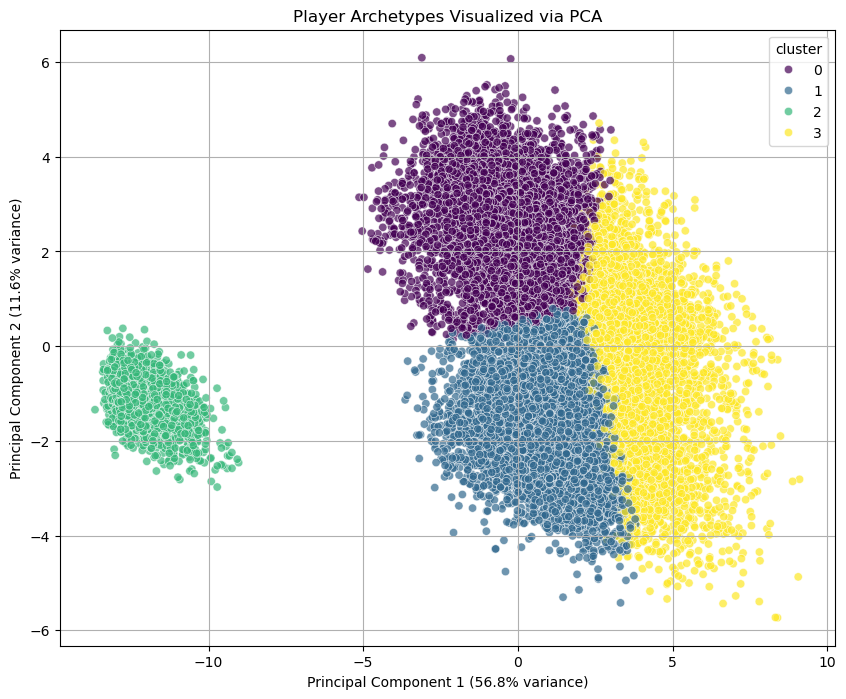

In [217]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2',hue='cluster',data=pca_df,palette='viridis',legend='full',alpha=0.7)
plt.title('Player Archetypes Visualized via PCA')
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)')
plt.grid(True);

### To name the clusters, we look at the average stats of the players within each group.

In [218]:
# Group the players by cluster and calculate the mean of the core stats
cluster_analysis = df.groupby('cluster')[features].mean()

print("\n Cluster Archetype Analysis (Average Stats)")
print(cluster_analysis[['pace','shooting','passing','defending','physic','overall',
    'goalkeeping_diving']].round(1))



 Cluster Archetype Analysis (Average Stats)
         pace  shooting  passing  defending  physic  overall  \
cluster                                                        
0        62.4      37.4     50.4       62.2    68.0     63.9   
1        71.3      57.3     54.8       36.1    57.4     62.2   
2         NaN       NaN      NaN        NaN     NaN     64.3   
3        71.5      63.3     67.3       57.9    69.3     72.0   

         goalkeeping_diving  
cluster                      
0                      10.3  
1                      10.1  
2                      64.8  
3                      10.4  


In [227]:
df[df['cluster']==0].head(10)

,player_id,player_url,fifa_version,fifa_update,update_as_of,short_name,long_name,player_positions,overall,potential,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,cluster
104,232580,/player/232580/gabriel-dos-s-magalhaes/240002,24.0,2.0,2023-09-22,Gabriel,Gabriel dos Santos Magalhães,CB,84,86,...,80+2,80+2,73+2,76+2,84+2,84+2,84+2,76+2,18+2,0
106,237086,/player/237086/min-jae-kim/240002,24.0,2.0,2023-09-22,Kim Min Jae,김민재 金敏在,CB,84,86,...,79+2,79+2,74+2,77+2,84+2,84+2,84+2,77+2,19+2,0
154,213661,/player/213661/andreas-christensen/240002,24.0,2.0,2023-09-22,A. Christensen,Andreas Bødtker Christensen,CB,83,85,...,81+2,81+2,77+2,78+2,83+2,83+2,83+2,78+2,17+2,0
157,229582,/player/229582/gianluca-mancini/240002,24.0,2.0,2023-09-22,G. Mancini,Gianluca Mancini,CB,83,85,...,78+2,78+2,73+2,75+2,83+2,83+2,83+2,75+2,18+2,0
182,204638,/player/204638/willi-orban/240002,24.0,2.0,2023-09-22,W. Orban,Vilmos Tamás Orban,CB,83,83,...,76+3,76+3,70+3,73+3,83,83,83,73+3,19+3,0
191,210413,/player/210413/alessio-romagnoli/240002,24.0,2.0,2023-09-22,A. Romagnoli,Alessio Romagnoli,CB,83,83,...,78+2,78+2,73+2,76+2,83,83,83,76+2,18+2,0
203,233486,/player/233486/robin-le-normand/240002,24.0,2.0,2023-09-22,R. Le Normand,Robin Le Normand,CB,82,87,...,76+2,76+2,71+2,74+2,82+2,82+2,82+2,74+2,20+2,0
233,225341,/player/225341/david-garcia-zubiria/240002,24.0,2.0,2023-09-22,David García,David García Zubiría,CB,82,83,...,79+2,79+2,75+2,76+2,82+1,82+1,82+1,76+2,18+2,0
249,204639,/player/204639/stefan-savic/240002,24.0,2.0,2023-09-22,S. Savić,Stefan Savić,CB,82,82,...,77+2,77+2,70+2,74+2,82,82,82,74+2,20+2,0
274,237678,/player/237678/ibrahima-konate/240002,24.0,2.0,2023-09-22,I. Konaté,Ibrahima Konaté,CB,81,87,...,76+2,76+2,72+2,74+2,81+2,81+2,81+2,74+2,17+2,0


In [ ]:
# above is a  profile good level cb

In [220]:
df[df['cluster']==1].head(10)

,player_id,player_url,fifa_version,fifa_update,update_as_of,short_name,long_name,player_positions,overall,potential,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,cluster
1422,246672,/player/246672/ander-barrenetxea/240002,24.0,2.0,2023-09-22,Barrenetxea,Ander Barrenetxea Muguruza,"LW, RW, LM",75,84,...,45+2,45+2,51+2,47+2,36+2,36+2,36+2,47+2,17+2,1
1589,237997,/player/237997/uriel-antuna/240002,24.0,2.0,2023-09-22,U. Antuna,Carlos Uriel Antuna Romero,"RM, LM, RW",75,76,...,51+2,51+2,58+2,54+2,41+2,41+2,41+2,54+2,17+2,1
1778,245694,/player/245694/adama-traore/240002,24.0,2.0,2023-09-22,A. Traoré,Adama Malouda Traoré,"RW, CAM",75,75,...,46+2,46+2,53+2,49+2,39+2,39+2,39+2,49+2,14+2,1
1788,254088,/player/254088/amad-diallo/240002,24.0,2.0,2023-09-22,A. Diallo,Amad Diallo Traoré,"RW, CAM",74,84,...,47+2,47+2,52+2,48+2,37+2,37+2,37+2,48+2,17+2,1
1794,261050,/player/261050/francisco-f-da-conceicao/240002,24.0,2.0,2023-09-22,Francisco Conceição,Francisco Fernandes Conceição,"RM, RW, LW",74,84,...,51+2,51+2,56+2,52+2,40+2,40+2,40+2,52+2,17+2,1
1861,273990,/player/273990/jefferson-ruan-pereira-dos-sant...,24.0,2.0,2023-09-22,Jeffinho,Jefferson Ruan Pereira dos Santos,"LW, LM",74,81,...,53+2,53+2,59+2,55+2,42+2,42+2,42+2,55+2,18+2,1
1884,259139,/player/259139/david-pereira-da-costa/240002,24.0,2.0,2023-09-22,David Costa,David Pereira Da Costa,LW,74,80,...,52+2,52+2,55+2,51+2,41+2,41+2,41+2,51+2,15+2,1
2236,230370,/player/230370/michael-renan-dimeira-couto/240002,24.0,2.0,2023-09-22,Michael Dimeira,Michael Renan Dimeira Couto,"CAM, RM",74,74,...,56+2,56+2,59+2,55+2,47+2,47+2,47+2,55+2,14+2,1
2268,237031,/player/237031/bernardo-cuesta/240002,24.0,2.0,2023-09-22,B. Cuesta,Bernardo Nicolás Cuesta,ST,74,74,...,44+2,44+2,47+2,45+2,43+2,43+2,43+2,45+2,15+2,1
2311,264432,/player/264432/abdessamad-ezzalzouli/240002,24.0,2.0,2023-09-22,A. Ezzalzouli,Abdessamad Ezzalzouli,"LM, RM",73,83,...,47+2,47+2,51+2,47+2,39+2,39+2,39+2,47+2,14+2,1


In [221]:
# low profile players

In [222]:
df[df['cluster']==2].head(10)

,player_id,player_url,fifa_version,fifa_update,update_as_of,short_name,long_name,player_positions,overall,potential,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,cluster
6,192119,/player/192119/thibaut-courtois/240002,24.0,2.0,2023-09-22,T. Courtois,Thibaut Nicolas Marc Courtois,GK,90,90,...,31+3,31+3,29+3,29+3,29+3,29+3,29+3,29+3,88+2,2
9,212831,/player/212831/alisson-ramses-becker/240002,24.0,2.0,2023-09-22,Alisson,Alisson Ramsés Becker,GK,89,90,...,39+3,39+3,34+3,33+3,33+3,33+3,33+3,33+3,87+3,2
13,192448,/player/192448/marc-andre-ter-stegen/240002,24.0,2.0,2023-09-22,M. ter Stegen,Marc-André ter Stegen,GK,89,89,...,41+3,41+3,33+3,31+3,33+3,33+3,33+3,31+3,87+2,2
19,210257,/player/210257/ederson-santana-de-moraes/240002,24.0,2.0,2023-09-22,Ederson,Ederson Santana de Moraes,GK,88,89,...,44+3,44+3,38+3,36+3,35+3,35+3,35+3,36+3,86+3,2
22,200389,/player/200389/jan-oblak/240002,24.0,2.0,2023-09-22,J. Oblak,Jan Oblak,GK,88,88,...,37+3,37+3,32+3,32+3,34+3,34+3,34+3,32+3,86+2,2
27,230621,/player/230621/gianluigi-donnarumma/240002,24.0,2.0,2023-09-22,G. Donnarumma,Gianluigi Donnarumma,GK,87,90,...,34+3,34+3,31+3,30+3,31+3,31+3,31+3,30+3,85+3,2
29,235073,/player/235073/gregor-kobel/240002,24.0,2.0,2023-09-22,G. Kobel,Gregor Kobel,GK,87,90,...,33+3,33+3,29+3,28+3,30+3,30+3,30+3,28+3,85+3,2
30,215698,/player/215698/mike-maignan/240002,24.0,2.0,2023-09-22,M. Maignan,Mike Maignan,GK,87,89,...,43+3,43+3,37+3,35+3,35+3,35+3,35+3,35+3,85+3,2
32,167495,/player/167495/manuel-neuer/240002,24.0,2.0,2023-09-22,M. Neuer,Manuel Peter Neuer,GK,87,87,...,43+3,43+3,35+3,33+3,34+3,34+3,34+3,33+3,85+2,2
51,186153,/player/186153/wojciech-szczesny/240002,24.0,2.0,2023-09-22,W. Szczęsny,Wojciech Tomasz Szczęsny,GK,86,86,...,31+3,31+3,28+3,28+3,29+3,29+3,29+3,28+3,84+2,2


In [58]:
# Above cluster represents goalkeepers

In [224]:
df[df['cluster']==3].head(20)

,player_id,player_url,fifa_version,fifa_update,update_as_of,short_name,long_name,player_positions,overall,potential,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,cluster
0,231747,/player/231747/kylian-mbappe/240002,24.0,2.0,2023-09-22,K. Mbappé,Kylian Mbappé Lottin,"ST, LW",91,94,...,63+3,63+3,68+3,63+3,54+3,54+3,54+3,63+3,18+3,3
1,239085,/player/239085/erling-haaland/240002,24.0,2.0,2023-09-22,E. Haaland,Erling Braut Haaland,ST,91,94,...,63+3,63+3,62+3,60+3,62+3,62+3,62+3,60+3,19+3,3
2,192985,/player/192985/kevin-de-bruyne/240002,24.0,2.0,2023-09-22,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,...,80+3,80+3,79+3,75+3,70+3,70+3,70+3,75+3,21+3,3
3,158023,/player/158023/lionel-messi/240002,24.0,2.0,2023-09-22,L. Messi,Lionel Andrés Messi Cuccittini,"CF, CAM",90,90,...,63+3,63+3,64+3,59+3,49+3,49+3,49+3,59+3,19+3,3
4,165153,/player/165153/karim-benzema/240002,24.0,2.0,2023-09-22,K. Benzema,Karim Benzema,"CF, ST",90,90,...,64+3,64+3,64+3,60+3,55+3,55+3,55+3,60+3,18+3,3
5,188545,/player/188545/robert-lewandowski/240002,24.0,2.0,2023-09-22,R. Lewandowski,Robert Lewandowski,ST,90,90,...,66+3,66+3,65+3,61+3,61+3,61+3,61+3,61+3,19+3,3
7,202126,/player/202126/harry-kane/240002,24.0,2.0,2023-09-22,H. Kane,Harry Kane,ST,90,90,...,69+3,69+3,67+3,64+3,63+3,63+3,63+3,64+3,20+3,3
8,238794,/player/238794/vinicius-jose-de-oliveira-junio...,24.0,2.0,2023-09-22,Vini Jr.,Vinícius José Paixão de Oliveira Júnior,LW,89,94,...,58+3,58+3,62+3,57+3,45+3,45+3,45+3,57+3,16+3,3
10,231866,/player/231866/rodrigo-hernandez-cascante/240002,24.0,2.0,2023-09-22,Rodri,Rodrigo Hernández Cascante,"CDM, CM",89,90,...,87+3,87+3,80+3,80+3,84+3,84+3,84+3,80+3,19+3,3
11,239818,/player/239818/ruben-santos-gato-alves-dias/24...,24.0,2.0,2023-09-22,Rúben Dias,Rúben dos Santos Gato Alves Dias,CB,89,90,...,83+3,83+3,78+3,80+3,88+2,88+2,88+2,80+3,18+3,3


In [225]:
# Above cluster represents elite players

### "Our K-Means model is so effective that when we ask it for a replacement for a star player like [Player Name], it returns a list of the most statistically similar players in the world."

In [231]:
# FIFA 24 Player Recommendation System
# Add this code to your Jupyter notebook after your clustering analysis
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

# ============================================
# 1. CREATE RECOMMENDATION FUNCTIONS
# ============================================

def get_similar_players_by_stats(player_name, df, X_scaled, n_recommendations=5, method='euclidean'):
    """
    Find similar players based on their scaled statistics
    
    Parameters:
    - player_name: Name of the player to find recommendations for
    - df: Your original dataframe with player data
    - X_scaled: Your scaled feature matrix
    - n_recommendations: Number of similar players to return
    - method: 'euclidean' or 'cosine' similarity
    """
    # Find the index of the player
    try:
        player_idx = df[df['short_name'] == player_name].index[0]
    except:
        print(f"Player '{player_name}' not found!")
        return None
    
    # Get the player's scaled features
    player_features = X_scaled[player_idx].reshape(1, -1)
    
    # Calculate similarity/distance to all other players
    if method == 'euclidean':
        distances = euclidean_distances(player_features, X_scaled)[0]
        # Convert to similarity score (inverse of distance)
        similarities = 1 / (1 + distances)
    else:  # cosine
        similarities = cosine_similarity(player_features, X_scaled)[0]
    
    # Get indices of most similar players (excluding the player itself)
    similar_indices = similarities.argsort()[::-1][1:n_recommendations+1]
    
    # Create results dataframe
    results = df.iloc[similar_indices].copy()
    results['similarity_score'] = similarities[similar_indices]
    results['distance'] = euclidean_distances(player_features, X_scaled[similar_indices])[0]
    
    return results


def get_similar_players_by_cluster(player_name, df, n_recommendations=5):
    """
    Find similar players within the same cluster
    """
    try:
        player_row = df[df['short_name'] == player_name].iloc[0]
        player_cluster = player_row['cluster']
    except:
        print(f"Player '{player_name}' not found!")
        return None
    
    # Get all players in the same cluster (excluding the selected player)
    same_cluster = df[(df['cluster'] == player_cluster) & (df['short_name'] != player_name)]
    
    # Sort by overall rating or other criteria
    similar_players = same_cluster.nlargest(n_recommendations, 'overall')
    
    return similar_players


def recommend_players(player_name, df, X_scaled, n_recommendations=5):
    """
    Comprehensive recommendation combining both methods
    """
    print(f"\n{'='*80}")
    print(f"🎮 RECOMMENDATIONS FOR: {player_name}")
    print(f"{'='*80}\n")
    
    # Get player info
    try:
        player = df[df['short_name'] == player_name].iloc[0]
        print(f"📊 Player Stats:")
        print(f"   Overall: {player['overall']} | Cluster: {player['cluster']}")
        print(f"   Pace: {player['pace']} | Shooting: {player['shooting']} | Passing: {player['passing']}")
        print(f"   Defending: {player['defending']} | Physical: {player['physic']}")
    except:
        print(f"Player '{player_name}' not found!")
        return None
    
    # Method 1: Most similar by stats (across all clusters)
    print(f"\n🔍 TOP {n_recommendations} MOST SIMILAR PLAYERS (By Stats):")
    print("-" * 80)
    similar_by_stats = get_similar_players_by_stats(player_name, df, X_scaled, n_recommendations)
    
    if similar_by_stats is not None:
        display_cols = ['short_name', 'overall', 'cluster', 'pace', 'shooting', 
                       'passing', 'defending', 'physic', 'similarity_score']
        print(similar_by_stats[display_cols].to_string(index=False))
    
    # Method 2: Similar players in same cluster
    print(f"\n👥 TOP {n_recommendations} SIMILAR PLAYERS IN SAME CLUSTER:")
    print("-" * 80)
    similar_by_cluster = get_similar_players_by_cluster(player_name, df, n_recommendations)
    
    if similar_by_cluster is not None:
        display_cols = ['short_name', 'overall', 'pace', 'shooting', 
                       'passing', 'defending', 'physic']
        print(similar_by_cluster[display_cols].to_string(index=False))
    
    return {
        'by_stats': similar_by_stats,
        'by_cluster': similar_by_cluster
    }


# ============================================
# 2. CLUSTER INSIGHTS FUNCTION
# ============================================

def get_cluster_insights(df):
    """
    Provide detailed insights about each cluster
    """
    print("\n" + "="*80)
    print("📈 CLUSTER ANALYSIS & INSIGHTS")
    print("="*80)
    
    for cluster_id in sorted(df['cluster'].unique()):
        cluster_data = df[df['cluster'] == cluster_id]
        
        print(f"\n🎯 CLUSTER {cluster_id}")
        print("-" * 80)
        print(f"Number of Players: {len(cluster_data)}")
        print(f"Average Overall: {cluster_data['overall'].mean():.1f}")
        
        # Get cluster archetype based on your analysis
        if cluster_id == 0:
            archetype = "🛡️ DEFENDERS"
        elif cluster_id == 1:
            archetype = "⚡ ATTACKERS"
        elif cluster_id == 2:
            archetype = "🧤 GOALKEEPERS"
        elif cluster_id == 3:
            archetype = "⭐ ELITE ALL-ROUNDERS"
        else:
            archetype = f"Cluster {cluster_id}"
        
        print(f"Archetype: {archetype}")
        
        # Key characteristics
        print(f"\nKey Stats (Average):")
        print(f"  Pace: {cluster_data['pace'].mean():.1f}")
        print(f"  Shooting: {cluster_data['shooting'].mean():.1f}")
        print(f"  Passing: {cluster_data['passing'].mean():.1f}")
        print(f"  Defending: {cluster_data['defending'].mean():.1f}")
        print(f"  Physical: {cluster_data['physic'].mean():.1f}")
        
        # Top 5 players in cluster
        print(f"\nTop 5 Players:")
        top_players = cluster_data.nlargest(5, 'overall')[['short_name', 'overall']]
        for idx, row in top_players.iterrows():
            print(f"  • {row['short_name']} (OVR: {row['overall']})")


# ============================================
# 3. FIND REPLACEMENT PLAYER FUNCTION
# ============================================

def find_replacement_player(player_name, df, X_scaled, max_budget=None, 
                            same_cluster_only=False, n_recommendations=5):
    """
    Find replacement players based on similarity and budget constraints
    """
    print(f"\n{'='*80}")
    print(f"🔄 FINDING REPLACEMENTS FOR: {player_name}")
    print(f"{'='*80}\n")
    
    # Get similar players
    similar_players = get_similar_players_by_stats(player_name, df, X_scaled, 
                                                   n_recommendations=20)
    
    if similar_players is None:
        return None
    
    # Apply filters
    if same_cluster_only:
        player_cluster = df[df['short_name'] == player_name].iloc[0]['cluster']
        similar_players = similar_players[similar_players['cluster'] == player_cluster]
    
    if max_budget and 'value_eur' in df.columns:
        similar_players = similar_players[similar_players['value_eur'] <= max_budget]
    
    # Get top n
    results = similar_players.head(n_recommendations)
    
    print(f"Found {len(results)} suitable replacements:\n")
    display_cols = ['short_name', 'overall', 'cluster', 'similarity_score']
    if 'value_eur' in df.columns:
        display_cols.append('value_eur')
    
    print(results[display_cols].to_string(index=False))
    
    return results


# ============================================
# 4. EXAMPLE USAGE
# ============================================

# Make sure your df has a 'cluster' column from your K-means clustering
# Example: df['cluster'] = kmeans.labels_

print("\n" + "="*80)
print("🎮 FIFA 24 PLAYER RECOMMENDATION SYSTEM")
print("="*80)

# First, get cluster insights
get_cluster_insights(df)

# Example 1: Get recommendations for a specific player
# Replace 'L. Messi' with any player name from your dataset
recommendations = recommend_players('L. Messi', df, X_scaled, n_recommendations=5)

# Example 2: Find similar players in the same cluster only
print("\n" + "="*80)
similar_cluster = get_similar_players_by_cluster('L. Messi', df, n_recommendations=5)

# Example 3: Find replacement players
# If you have budget data, you can add max_budget parameter
replacement = find_replacement_player('L. Messi', df, X_scaled, 
                                     same_cluster_only=False, 
                                     n_recommendations=5)


# ============================================
# 5. INTERACTIVE SEARCH (OPTIONAL)
# ============================================

def interactive_search(df, X_scaled):
    """
    Interactive player search and recommendation
    """
    while True:
        print("\n" + "="*80)
        player_name = input("Enter player name (or 'quit' to exit): ")
        
        if player_name.lower() == 'quit':
            break
        
        # Search for player (partial match)
        matches = df[df['short_name'].str.contains(player_name, case=False, na=False)]
        
        if len(matches) == 0:
            print(f"No players found matching '{player_name}'")
            continue
        
        if len(matches) > 1:
            print(f"\nFound {len(matches)} players:")
            for idx, row in matches.head(10).iterrows():
                print(f"  • {row['short_name']} (OVR: {row['overall']})")
            print("\nPlease be more specific.")
            continue
        
        # Get recommendations
        exact_name = matches.iloc[0]['short_name']
        recommend_players(exact_name, df, X_scaled, n_recommendations=5)

# Uncomment to run interactive search
interactive_search(df, X_scaled)


🎮 FIFA 24 PLAYER RECOMMENDATION SYSTEM

📈 CLUSTER ANALYSIS & INSIGHTS

🎯 CLUSTER 0
--------------------------------------------------------------------------------
Number of Players: 5491
Average Overall: 63.9
Archetype: 🛡️ DEFENDERS

Key Stats (Average):
  Pace: 62.4
  Shooting: 37.4
  Passing: 50.4
  Defending: 62.2
  Physical: 68.0

Top 5 Players:
  • Gabriel (OVR: 84)
  • Kim Min Jae (OVR: 84)
  • A. Christensen (OVR: 83)
  • G. Mancini (OVR: 83)
  • W. Orban (OVR: 83)

🎯 CLUSTER 1
--------------------------------------------------------------------------------
Number of Players: 5417
Average Overall: 62.2
Archetype: ⚡ ATTACKERS

Key Stats (Average):
  Pace: 71.3
  Shooting: 57.3
  Passing: 54.8
  Defending: 36.1
  Physical: 57.4

Top 5 Players:
  • Barrenetxea (OVR: 75)
  • U. Antuna (OVR: 75)
  • A. Traoré (OVR: 75)
  • A. Diallo (OVR: 74)
  • Francisco Conceição (OVR: 74)

🎯 CLUSTER 2
--------------------------------------------------------------------------------
Number of Pla

Enter player name (or 'quit' to exit):  J. Oblak



🎮 RECOMMENDATIONS FOR: J. Oblak

📊 Player Stats:
   Overall: 88 | Cluster: 2
   Pace: nan | Shooting: nan | Passing: nan
   Defending: nan | Physical: nan

🔍 TOP 5 MOST SIMILAR PLAYERS (By Stats):
--------------------------------------------------------------------------------
   short_name  overall  cluster  pace  shooting  passing  defending  physic  similarity_score
  T. Courtois       90        2   NaN       NaN      NaN        NaN     NaN          0.240630
G. Donnarumma       87        2   NaN       NaN      NaN        NaN     NaN          0.233953
     K. Navas       85        2   NaN       NaN      NaN        NaN     NaN          0.230452
  W. Szczęsny       86        2   NaN       NaN      NaN        NaN     NaN          0.228778
  K. Casteels       84        2   NaN       NaN      NaN        NaN     NaN          0.210612

👥 TOP 5 SIMILAR PLAYERS IN SAME CLUSTER:
--------------------------------------------------------------------------------
   short_name  overall  pace  shoo

Enter player name (or 'quit' to exit):  quit


In [ ]:
df.head()